<a href="https://colab.research.google.com/github/JuliPolu/Deep_Learning_TensorFlow_Course/blob/main/Assignment_5_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №5

1. Попробуйте изменить параметры нейронной сети работающей с датасетом imdb либо нейронной сети работающей airline-passengers(она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить ее точность. Приложите анализ.
2. Попробуйте изменить параметры нейронной сети генерирующий текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившейся у вас текст и опишите, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Bidirectional
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/My Drive/Colab Notebooks/GB_NEURAL_NETWORK/Les_5_Rec_NN/"

## Задание 1

In [ ]:
np.random.seed(7)
tf.random.set_seed(7)

dataframe = read_csv(path+'airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

Обучим нейронную сеть

In [ ]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

Предсказание

In [ ]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

44/44 [==============================] - 0s 3ms/step


In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScoreBase = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScoreBase = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

In [ ]:
trainPredictPlotBase = np.empty_like(dataset)
trainPredictPlotBase[:, :] = np.nan
trainPredictPlotBase[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
testPredictPlotBase = np.empty_like(dataset)
testPredictPlotBase[:, :] = np.nan
testPredictPlotBase[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

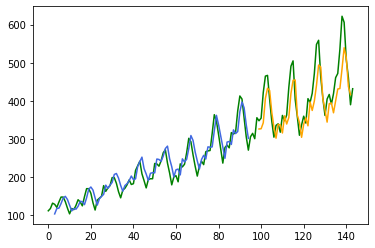

Train Score: 23.14 RMSE
Test Score: 50.88 RMSE


In [ ]:
plt.plot(scaler.inverse_transform(dataset), c='green')
plt.plot(trainPredictPlotBase, c='royalblue')
plt.plot(testPredictPlotBase, c='orange')
plt.show()

print('Train Score: %.2f RMSE' % (trainScoreBase))
print('Test Score: %.2f RMSE' % (testScoreBase))

**Произведем подбор параметрво для улучшения сети**

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
batch_size = 1

model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

In [ ]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

44/44 [==============================] - 0s 3ms/step


In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScoreNew = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScoreNew = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

In [ ]:
trainPredictPlotNew = np.empty_like(dataset)
trainPredictPlotNew[:, :] = np.nan
trainPredictPlotNew[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlotNew = np.empty_like(dataset)
testPredictPlotNew[:, :] = np.nan
testPredictPlotNew[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

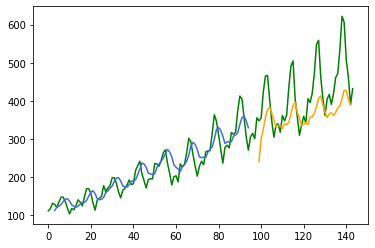

Train Score: 29.41 RMSE
Test Score: 82.30 RMSE


In [ ]:
plt.plot(scaler.inverse_transform(dataset), c='green')
plt.plot(trainPredictPlotNew, c='royalblue')
plt.plot(testPredictPlotNew, c='orange')
plt.show()

print('Train Score: %.2f RMSE' % (trainScoreNew))
print('Test Score: %.2f RMSE' % (testScoreNew))

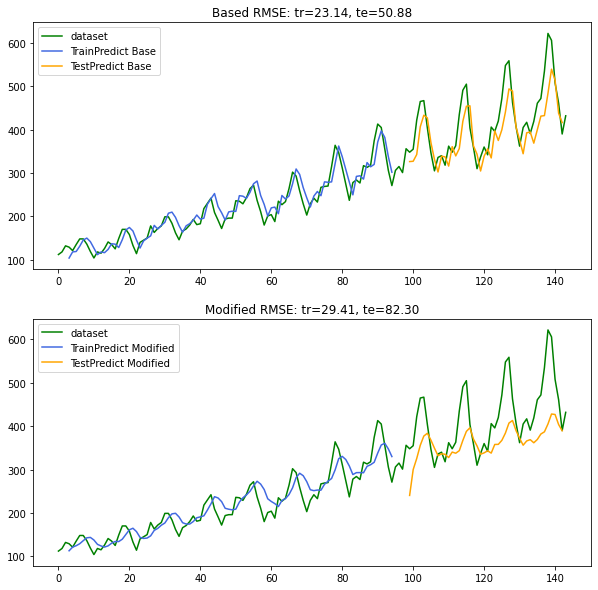

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.title(f"Based RMSE: tr={trainScoreBase:.2f}, te={testScoreBase:.2f}")
plt.plot(scaler.inverse_transform(dataset),'g', label = 'dataset')
plt.plot(trainPredictPlotBase,'royalblue', label = 'TrainPredict Base')
plt.plot(testPredictPlotBase,'orange', label = 'TestPredict Base')
plt.legend()
plt.subplot(2, 1, 2)
plt.title(f"Modified RMSE: tr={trainScoreNew:.2f}, te={testScoreNew:.2f}")
plt.plot(scaler.inverse_transform(dataset),'g', label = 'dataset')
plt.plot(trainPredictPlotNew,'royalblue', label = 'TrainPredict Modified')
plt.plot(testPredictPlotNew,'orange', label = 'TestPredict Modified')
plt.legend()
plt.show()

По итогам расчетов и по графика видно, что помогла улучшить результат настройка скорости обучения оптимайзера Adam .

Также были проделаны многочисленные эксперименты с размером батча, с числом слоев, с числом нейронов, с количеством эпох и добавление Dropout, однако они дали какого-то лучшего результата метрик, а зачастую даже их ухудшали.

## Задание 2

In [ ]:
data = open(path+'alice_in_wonderland.txt').read()
corpus = data.lower().split("\n")
corpus[:10]

['project gutenberg’s alice’s adventures in wonderland, by lewis carroll',
 '',
 'this ebook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  you may copy it, give it away or',
 're-use it under the terms of the project gutenberg license included',
 'with this ebook or online at www.gutenberg.org',
 '',
 '',
 'title: alice’s adventures in wonderland',
 '']

In [ ]:
# Создаем объект для токенизации
total_words = 1000
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(corpus)

In [ ]:
print(corpus[0])
print(tokenizer.texts_to_sequences([corpus[0]]))
print(tokenizer.word_index['from'], tokenizer.word_index['speech'])

project gutenberg’s alice’s adventures in wonderland, by lewis carroll
[[54, 250, 345, 10, 483, 59, 822, 823]]
99 1113


In [ ]:
# создадим последовательность токенов
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        sequence = token_list[:i+1]
        input_sequences.append(sequence)
input_sequences[:10]

[[54, 250],
 [54, 250, 345],
 [54, 250, 345, 10],
 [54, 250, 345, 10, 483],
 [54, 250, 345, 10, 483, 59],
 [54, 250, 345, 10, 483, 59, 822],
 [54, 250, 345, 10, 483, 59, 822, 823],
 [22, 444],
 [22, 444, 31],
 [22, 444, 31, 24]]

In [ ]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[:10]

18


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  54, 250],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  54, 250, 345],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  54, 250, 345,  10],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 250, 345,  10, 483],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54,
        250, 345,  10, 483,  59],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 250,
        345,  10, 483,  59, 822],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 250, 345,
         10, 483,  59, 822, 823],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  22, 444],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  22, 444,  31],
       [  0,   0,   0,   0,   0,   0,

In [ ]:
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

label = to_categorical(label, num_classes=total_words)
label.shape

(24694, 1000)

In [ ]:
predictors[0], np.argmax(label[0])

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 54],
       dtype=int32), 250)

Обучим нейронную сеть

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

model = Sequential()
model.add(Embedding(input_dim=total_words,
                    output_dim=512,
                    input_length=max_sequence_len-1))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
# model.add(Bidirectional(LSTM(512, return_sequences=True)))
# model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(LSTM(1024))
model.add(Dropout(0.25))
model.add(Dense(total_words * 2 , activation='relu'))
# model.add(Dense(total_words * 2 , activation='relu'))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 512)           512000    
                                                                 
 bidirectional (Bidirectiona  (None, 17, 512)          1574912   
 l)                                                              
                                                                 
 lstm_3 (LSTM)               (None, 1024)              6295552   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 2000)              2050000   
                                                                 
 dense_3 (Dense)             (None, 1000)              2001000   
                                                      

In [ ]:
with tf.device("GPU:0"):
    history = model.fit(predictors, label,
                    batch_size = 1000,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
20/20 [==============================] - 15s 465ms/step - loss: 6.2408 - accuracy: 0.0325 - val_loss: 6.3212 - val_accuracy: 0.0858
Epoch 2/100
20/20 [==============================] - 7s 334ms/step - loss: 5.5740 - accuracy: 0.0548 - val_loss: 6.2707 - val_accuracy: 0.0858
Epoch 3/100
20/20 [==============================] - 6s 321ms/step - loss: 5.5276 - accuracy: 0.0615 - val_loss: 6.2205 - val_accuracy: 0.0858
Epoch 4/100
20/20 [==============================] - 7s 335ms/step - loss: 5.4572 - accuracy: 0.0641 - val_loss: 6.1671 - val_accuracy: 0.0660
Epoch 5/100
20/20 [==============================] - 6s 316ms/step - loss: 5.3465 - accuracy: 0.0677 - val_loss: 6.1401 - val_accuracy: 0.0745
Epoch 6/100
20/20 [==============================] - 6s 281ms/step - loss: 5.2057 - accuracy: 0.0783 - val_loss: 6.1896 - val_accuracy: 0.0867
Epoch 7/100
20/20 [==============================] - 7s 328ms/step - loss: 5.0891 - accuracy: 0.0858 - val_loss: 6.1607 - val_accuracy: 0.089

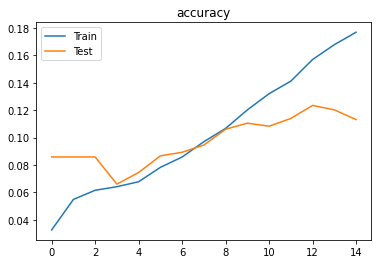

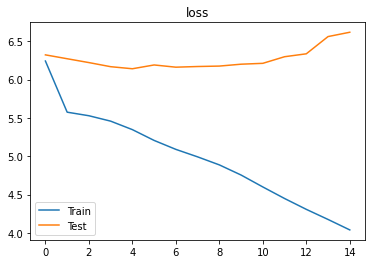

In [ ]:
acc = history.history['accuracy']
acc_v = history.history['val_accuracy']
loss = history.history['loss']
loss_v = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train')
plt.plot(epochs, acc_v, label='Test')
plt.legend()
plt.title('accuracy')

plt.figure()

plt.plot(epochs, loss, label='Train')
plt.plot(epochs, loss_v, label='Test')
plt.title('loss')
plt.legend()

plt.show()

**Генерируем текст**

In [ ]:
# seed_text = "Deep in the darkest part of your heart"

seed_text = "Alice did not quite know"

In [ ]:
next_words = 12

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_proba = model.predict(token_list, verbose=0)
    predicted_classes = np.argmax(predicted_proba, axis=1)

    output_word = tokenizer.index_word[predicted_classes[0]]
    seed_text += " " + output_word

print(seed_text)

[12, 74, 26, 84, 46]
[12, 74, 26, 84, 46, 15]
[12, 74, 26, 84, 46, 15, 208]
[12, 74, 26, 84, 46, 15, 208, 15]
[12, 74, 26, 84, 46, 15, 208, 15, 57]
[12, 74, 26, 84, 46, 15, 208, 15, 57, 25]
[12, 74, 26, 84, 46, 15, 208, 15, 57, 25, 5]
[12, 74, 26, 84, 46, 15, 208, 15, 57, 25, 5, 32]
[12, 74, 26, 84, 46, 15, 208, 15, 57, 25, 5, 32, 76]
[12, 74, 26, 84, 46, 15, 208, 15, 57, 25, 5, 32, 76, 2]
[12, 74, 26, 84, 46, 15, 208, 15, 57, 25, 5, 32, 76, 2, 9]
[12, 74, 26, 84, 46, 15, 208, 15, 57, 25, 5, 32, 76, 2, 9, 1]
Alice did not quite know i wish i could be a little way ’ said the gryphon


---